In [92]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

In [93]:
STATIONS_PATH = os.path.join(os.getcwd(), "stations.json")
MARGIN = 0.01

In [94]:
stations = pd.read_json(STATIONS_PATH)
stations.set_index("id", inplace=True)
stations["x"] = stations["position"].apply(lambda x: x[0])
stations["y"] = stations["position"].apply(lambda x: x[1])
display(stations)

,address,total,free,available,open,position,x,y
id,,,,,,,,
94,Blasco Ibañez - Clariano,20,16,4,True,"[39.47537832465668, -0.35158330144926003]",39.475378,-0.351583
36,Plaza de los Fueros - Conde Trenor,25,23,1,True,"[39.479072348860946, -0.375436379858104]",39.479072,-0.375436
38,Peris y Valero - Cabo Jubi,20,7,13,True,"[39.45940204927687, -0.37024937736936203]",39.459402,-0.370249
42,Av. de la Plata (Museo Fallero),20,4,16,True,"[39.45878127329601, -0.35865833788058904]",39.458781,-0.358658
56,Francia - Menorca,15,8,7,True,"[39.45842126509135, -0.344405289392865]",39.458421,-0.344405
...,...,...,...,...,...,...,...,...
238,San Jose Artesano - Francisco Morote Greus,15,6,9,True,"[39.497449418355934, -0.39438342966293305]",39.497449,-0.394383
256,Tres Forques - Turís,15,13,2,True,"[39.46396330656933, -0.39223544845537905]",39.463963,-0.392235
270,Ninot - Regino Mas,16,12,4,True,"[39.50007542649037, -0.392889423121417]",39.500075,-0.392889


In [95]:
positions = stations[['x', 'y']]
display(positions)

,x,y
id,,
94,39.475378,-0.351583
36,39.479072,-0.375436
38,39.459402,-0.370249
42,39.458781,-0.358658
56,39.458421,-0.344405
...,...,...
238,39.497449,-0.394383
256,39.463963,-0.392235
270,39.500075,-0.392889


In [96]:
X_min = positions['x'].min() - MARGIN
X_max = positions['x'].max() + MARGIN
Y_min = positions['y'].min() - MARGIN
Y_max = positions['y'].max() + MARGIN

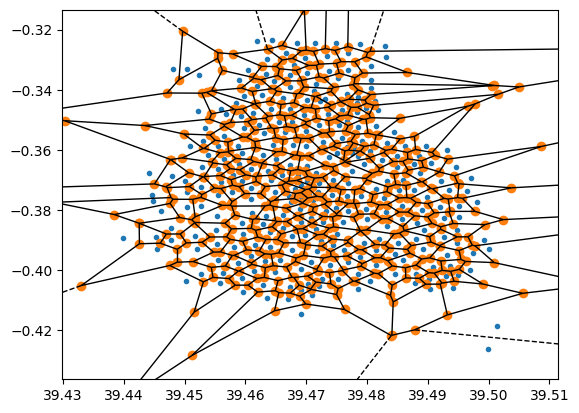

In [97]:
voronoi = Voronoi(positions)
voronoi_plot_2d(voronoi)
plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)
plt.show()

In [98]:
bounding_points_distance = 0.01

bounding_points_left = np.linspace(Y_min, Y_max, int((Y_max - Y_min) / bounding_points_distance))
bounding_points_left = np.array([[X_min, y] for y in bounding_points_left])

bounding_points_right = np.linspace(Y_min, Y_max, int((Y_max - Y_min) / bounding_points_distance))
bounding_points_right = np.array([[X_max, y] for y in bounding_points_right])

bounding_points_top = np.linspace(X_min, X_max, int((X_max - X_min) / bounding_points_distance))
bounding_points_top = np.array([[x, Y_max] for x in bounding_points_top])

bounding_points_bottom = np.linspace(X_min, X_max, int((X_max - X_min) / bounding_points_distance))
bounding_points_bottom = np.array([[x, Y_min] for x in bounding_points_bottom])

# Remove firts and last points
bounding_points_left = bounding_points_left[1:-1]
bounding_points_right = bounding_points_right[1:-1]
bounding_points_top = bounding_points_top[1:-1]
bounding_points_bottom = bounding_points_bottom[1:-1]

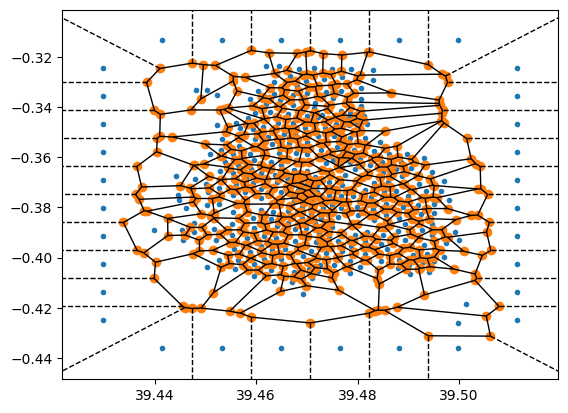

In [99]:
positions_for_voronoi = np.concatenate((positions, bounding_points_left, bounding_points_right, bounding_points_top, bounding_points_bottom))
voronoi = Voronoi(positions_for_voronoi)
voronoi_plot_2d(voronoi)
plt.show()

In [100]:
# Print each voronoi region
for region in voronoi.regions:
    print(region)

[]
[15, -1, 14]
[14, -1, 4]
[5, -1, 0]
[3, 1, -1]
[9, -1, 8]
[32, -1, 30, 29, 31]
[32, -1, 11, 25]
[30, -1, 7]
[23, 21, 20, -1, 22]
[8, -1, 7]
[22, -1, 6]
[20, -1, 2]
[13, 11, -1, 12]
[-1, 1, 6]
[34, 12, -1, 2, 33]
[37, 16, 3, -1, 15, 36]
[41, 17, 5, 0, 40]
[46, 19, 18, 45]
[62, 60, 59, 58, 61]
[61, -1, 58]
[59, 28, -1, 58]
[64, 33, 2, 20, 21, 19, 18, 63]
[75, 23, 22, 6, 1, 3, 16, 47, 73]
[76, 70, 46, 19, 21, 23, 75]
[86, 83, 82, 84, 85]
[84, 24, 29, 30, 7, 8, 9, 82]
[83, 49, -1, 9, 82]
[88, 44, 43, 50, 87]
[94, 92, 91, 90, 93]
[93, 13, 11, 25, 90]
[94, 89, 88, 87, 92]
[94, 89, 35, 34, 12, 13, 93]
[105, 77, 48, 78, 79, 51, 104]
[107, 53, 52, 24, 84, 85, 80, 106]
[112, 98, 96, 56, 111]
[117, 65, 66, 26, 10, 116]
[128, 64, 63, 126]
[128, 64, 33, 34, 35, 127]
[131, 17, 5, -1, 4, 130]
[148, 143, 145, 146, 144, 147]
[150, 73, 75, 76, 74, 149]
[153, 108, 54, 51, 79, 151]
[155, 151, 79, 78, 154]
[157, 152, 153, 151, 155]
[157, 152, 106, 80, 156]
[160, 81, 62, 61, -1, 159]
[162, 60, 62, 81, 16

In [101]:
# Print each voronoi point
for point in voronoi.points:
    print(point)

[39.47537832 -0.3515833 ]
[39.47907235 -0.37543638]
[39.45940205 -0.37024938]
[39.45878127 -0.35865834]
[39.45842127 -0.34440529]
[39.46621831 -0.38158641]
[39.46223128 -0.35177631]
[39.45981127 -0.34215228]
[39.4665183  -0.35419532]
[39.46280328 -0.34173328]
[39.4700833  -0.34346128]
[39.47605634 -0.38391441]
[39.46729429 -0.33516525]
[39.45524028 -0.39119345]
[39.45891228 -0.36477636]
[39.45651226 -0.35541833]
[39.45218325 -0.3472273 ]
[39.46447629 -0.35825633]
[39.46308829 -0.35454932]
[39.46129328 -0.3478303 ]
[39.46551629 -0.35083731]
[39.46195227 -0.33872127]
[39.47211331 -0.3517013 ]
[39.47851834 -0.36188033]
[39.47983534 -0.34611928]
[39.47306831 -0.34313227]
[39.47683534 -0.3802884 ]
[39.46908832 -0.37563739]
[39.47674734 -0.37534238]
[39.47432033 -0.37508438]
[39.46896732 -0.3797244 ]
[39.47503434 -0.38784743]
[39.46772932 -0.38861043]
[39.4673653  -0.36502835]
[39.4648183  -0.37399039]
[39.46374929 -0.36699436]
[39.45947728 -0.36115335]
[39.47382619 -0.33391527]
[39.48046635

In [102]:
point_region = {}
for point, region_p in zip(voronoi.points, voronoi.point_region):
    region = voronoi.regions[region_p]

    polygon = []
    if not -1 in region:
        for i in region:
            polygon.append(voronoi.vertices[i])

    point_region[tuple(point)] = polygon

display(point_region)

{(39.47537832465668, -0.35158330144926003): [array([39.47692401, -0.35194538]),
  array([39.47483634, -0.34969846]),
  array([39.47369784, -0.35031486]),
  array([39.47383004, -0.35397249]),
  array([39.47647917, -0.35368129])],
 (39.479072348860946, -0.375436379858104): [array([39.47798355, -0.37787608]),
  array([39.4807085 , -0.37735978]),
  array([39.48100827, -0.3748836 ]),
  array([39.47882971, -0.37285973]),
  array([39.47799502, -0.37328271]),
  array([39.4778125 , -0.37779722])],
 (39.45940204927687, -0.37024937736936203): [array([39.46169222, -0.36895881]),
  array([39.46005368, -0.36829813]),
  array([39.45764415, -0.36994051]),
  array([39.45787975, -0.37177578]),
  array([39.45895426, -0.37222746]),
  array([39.46178455, -0.3704721 ])],
 (39.45878127329601, -0.35865833788058904): [array([39.46162643, -0.35920924]),
  array([39.46167712, -0.35914213]),
  array([39.46154294, -0.3572413 ]),
  array([39.46019366, -0.355827  ]),
  array([39.45953387, -0.35571678]),
  array([39.

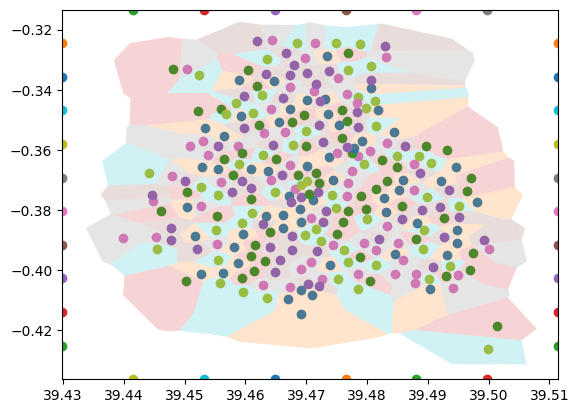

In [103]:
for point, polygon in point_region.items():
    plt.scatter(point[0], point[1])
    plt.fill(*zip(*polygon), alpha=0.2)

plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)

plt.show()

In [104]:
frames = []
for station_id, station in stations.iterrows():
    frames.append(
        {
            "id": station_id,
            "point": (station["x"], station["y"]),
            "region": point_region[(station["x"], station["y"])],
        }
    )

stations_id_regions = pd.DataFrame(frames)
stations_id_regions.set_index("id", inplace=True)

display(stations_id_regions)

,point,region
id,,
94,"(39.47537832465668, -0.35158330144926003)","[[39.47692400945448, -0.3519453835808549], [39..."
36,"(39.479072348860946, -0.375436379858104)","[[39.47798354894984, -0.3778760830877733], [39..."
38,"(39.45940204927687, -0.37024937736936203)","[[39.461692215830006, -0.36895881368740574], [..."
42,"(39.45878127329601, -0.35865833788058904)","[[39.46162643419572, -0.3592092387270748], [39..."
56,"(39.45842126509135, -0.344405289392865)","[[39.45842904961458, -0.3466434065407531], [39..."
...,...,...
238,"(39.497449418355934, -0.39438342966293305)","[[39.50095163648759, -0.3974843974562112], [39..."
256,"(39.46396330656933, -0.39223544845537905)","[[39.46337656183844, -0.38978940238968063], [3..."
270,"(39.50007542649037, -0.392889423121417)","[[39.50465161233753, -0.3991003561062195], [39..."


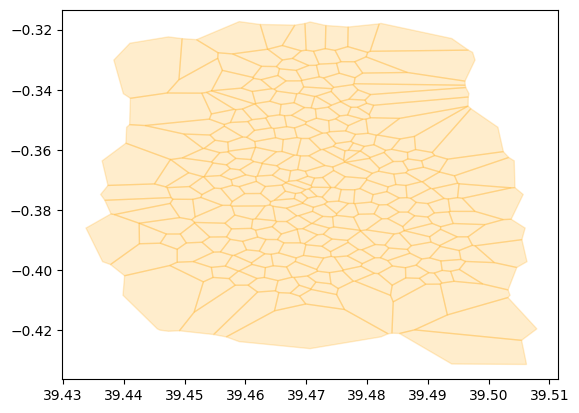

In [105]:
for station_id, station in stations_id_regions.iterrows():
    plt.fill(*zip(*station["region"]), alpha=0.2, color="orange")

plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)
plt.show()

In [106]:
# Save the regions to a json file
stations_id_regions.to_json("valenbci_voronoi.json", orient="index", indent=2)